In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This data analysis is done to find out what type of dog do people prefer. There are two reasons to explore this. 
A pet product company could use this data to market their product, using the most popular dog for advertisment. Moreover, the company can market their products for types of dog that people prefer.
The second reason is to find out which dogs are being neglected. Stray dog is an issue that is common in the western world. Dogs that aren't taken in the shelter are likely to be killed. This data can be used to show which type of dog aren't popular and try to make sure only popular dogs aren't taken to give fair chances to all the dogs.

In [2]:
Y2015 = pd.read_csv('20151001hundehalter.csv')
Y2016 = pd.read_csv('20160307hundehalter.csv')
Y2017 = pd.read_csv('20170308hundehalter.csv')
Zur = pd.read_csv('zuordnungstabellehunderassehundetyp.csv')

In [3]:
Y2015.head()

,HALTER_ID,ALTER,GESCHLECHT,STADTKREIS,STADTQUARTIER,RASSE1,RASSE1_MISCHLING,RASSE2,RASSE2_MISCHLING,RASSENTYP,GEBURTSJAHR_HUND,GESCHLECHT_HUND,HUNDEFARBE
0,126,51-60,m,9.0,92.0,Welsh Terrier,NaN,NaN,NaN,K,2011,w,schwarz/braun
1,574,61-70,w,2.0,23.0,Cairn Terrier,NaN,NaN,NaN,K,2002,w,brindle
2,695,41-50,m,6.0,63.0,Labrador Retriever,NaN,NaN,NaN,I,2012,w,braun
3,893,61-70,w,7.0,71.0,Mittelschnauzer,NaN,NaN,NaN,I,2010,w,schwarz
4,1177,51-60,m,10.0,102.0,Shih Tzu,NaN,NaN,NaN,K,2011,m,schwarz/weiss


In [4]:
Y2016.head()

,HALTER_ID,ALTER,GESCHLECHT,STADTKREIS,STADTQUARTIER,RASSE1,RASSE1_MISCHLING,RASSE2,RASSE2_MISCHLING,RASSENTYP,GEBURTSJAHR_HUND,GESCHLECHT_HUND,HUNDEFARBE
0,126,51-60,m,9.0,92.0,Welsh Terrier,NaN,NaN,NaN,K,2011,w,schwarz/braun
1,171,61-70,m,3.0,31.0,Berner Sennenhund,NaN,NaN,NaN,I,2009,m,tricolor
2,574,61-70,w,2.0,23.0,Cairn Terrier,NaN,NaN,NaN,K,2002,w,brindle
3,695,41-50,m,6.0,63.0,Labrador Retriever,NaN,NaN,NaN,I,2012,w,braun
4,893,61-70,w,7.0,71.0,Mittelschnauzer,NaN,NaN,NaN,I,2010,w,schwarz


In [5]:
Y2017.head()

,HALTER_ID,ALTER,GESCHLECHT,STADTKREIS,STADTQUARTIER,RASSE1,RASSE1_MISCHLING,RASSE2,RASSE2_MISCHLING,RASSENTYP,GEBURTSJAHR_HUND,GESCHLECHT_HUND,HUNDEFARBE
0,126,61-70,m,9.0,92.0,Welsh Terrier,NaN,NaN,NaN,K,2011,w,schwarz/braun
1,171,61-70,m,3.0,31.0,Berner Sennenhund,NaN,NaN,NaN,I,2009,m,tricolor
2,574,61-70,w,2.0,23.0,Mischling gross,NaN,NaN,NaN,I,2013,w,schwarz
3,695,41-50,m,6.0,63.0,Labrador Retriever,NaN,NaN,NaN,I,2012,w,braun
4,893,61-70,w,7.0,71.0,Mittelschnauzer,NaN,NaN,NaN,I,2010,w,schwarz


In [6]:
English_Translation =["Dog ID", 'Age','Gender','District', 'City Quarter','Primary Breed','Primary Breed Mixed','Secondary Breed','Secondary Breed Mixed',
 'Size',"Dog's Year of Birth","Dog's Gender","Dog's color"]
len(English_Translation)

13

In [7]:
Y2015.columns = English_Translation
Y2016.columns = English_Translation
Y2017.columns = English_Translation

The alarming thing about this data is the difference between pure breed and mixed dogs. The Zurich data indicates that more people prefer pure breed dog instead of mixed dog. While the reason behind this isn't known, it raises interesting implication for dogs in shelters. 
If the general preference is pure breed then it's very likely for a mixed breed dogs to be not rescued compare to pure bred dogs. 

Moreover, when it comes to age group, the younger generations are more likely to avoid getting mixed dogs. 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Mischling klein'),
  Text(1, 0, 'Chihuahua'),
  Text(2, 0, 'Labrador Retriever'),
  Text(3, 0, 'Jack Russel Terrier'),
  Text(4, 0, 'Yorkshire Terrier'),
  Text(5, 0, 'Malteser'),
  Text(6, 0, 'Mops'),
  Text(7, 0, 'Golden Retriever'),
  Text(8, 0, 'Französische Bulldogge'),
  Text(9, 0, 'Mischling gross')])

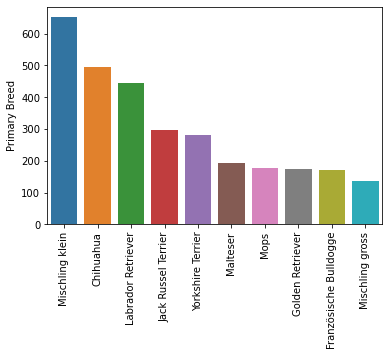

In [10]:
ten_popular = Y2015['Primary Breed'].value_counts()[10]
popular_dogs = pd.DataFrame(Y2015['Primary Breed'].value_counts())
popular_dogs_df = popular_dogs[popular_dogs['Primary Breed']>ten_popular]
sns.barplot(data= popular_dogs_df, x =popular_dogs_df.index, y = 'Primary Breed')
plt.xticks(rotation=90)

These are the most popular breed of dogs in Zurich.

<AxesSubplot:xlabel='Primary Breed'>

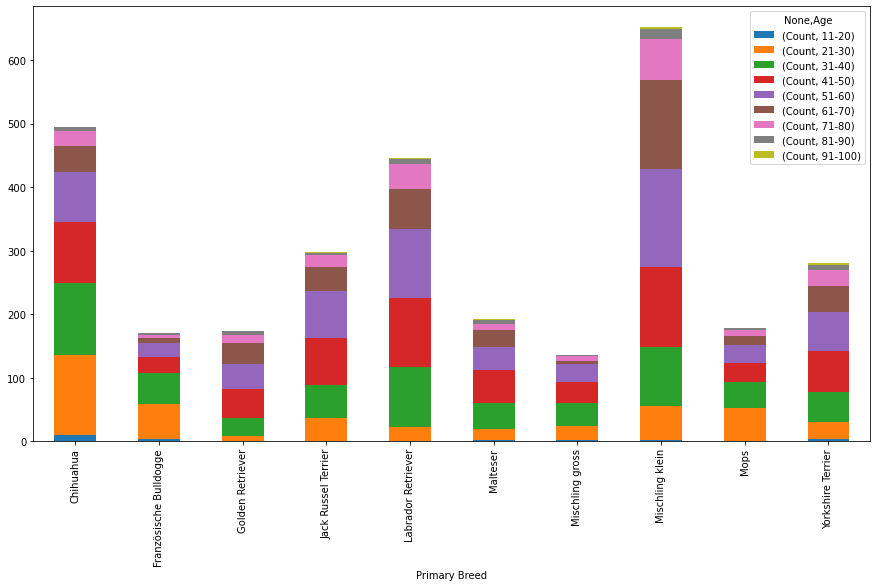

In [11]:
Age_Dog = pd.DataFrame(Y2015[['Primary Breed', 'Age',]].value_counts())
Age_Dog.reset_index(inplace = True)
Age_Dog_DF = Age_Dog[Age_Dog['Primary Breed'].isin(popular_dogs_df.index)]
Age_Dog_DF.columns = ['Primary Breed', 'Age', 'Count']
Age_Dog_DF.set_index(['Primary Breed', 'Age'], inplace = True)
Age_Dog_DF.unstack().plot(kind='bar', stacked=True,figsize=(15, 8))

<AxesSubplot:xlabel='Age'>

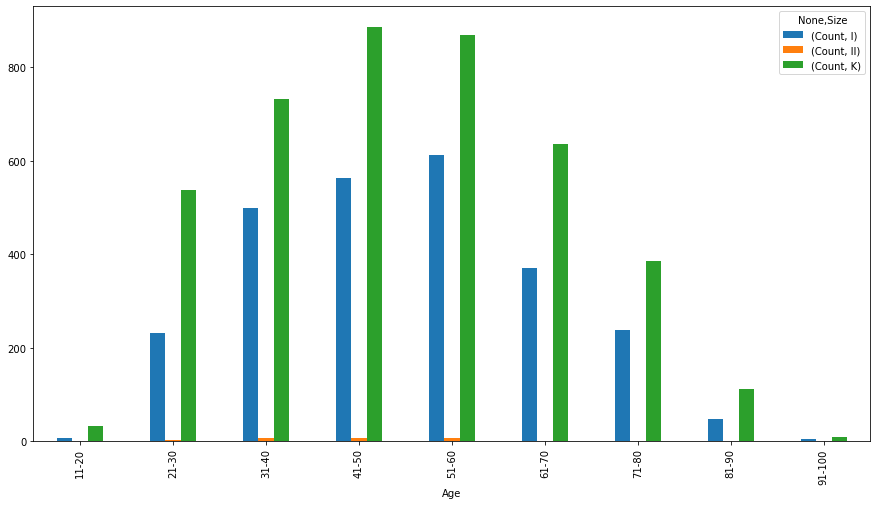

In [12]:
Size_Dog = pd.DataFrame(Y2015[['Age', 'Size']].value_counts())
Size_Dog.reset_index(inplace= True)
Size_Dog.columns = ['Age', 'Size', 'Count']
Size_Dog_df = Size_Dog.set_index(['Age', 'Size'])
Size_Dog_df.unstack().plot(kind='bar',figsize=(15, 8))

<AxesSubplot:xlabel='Gender'>

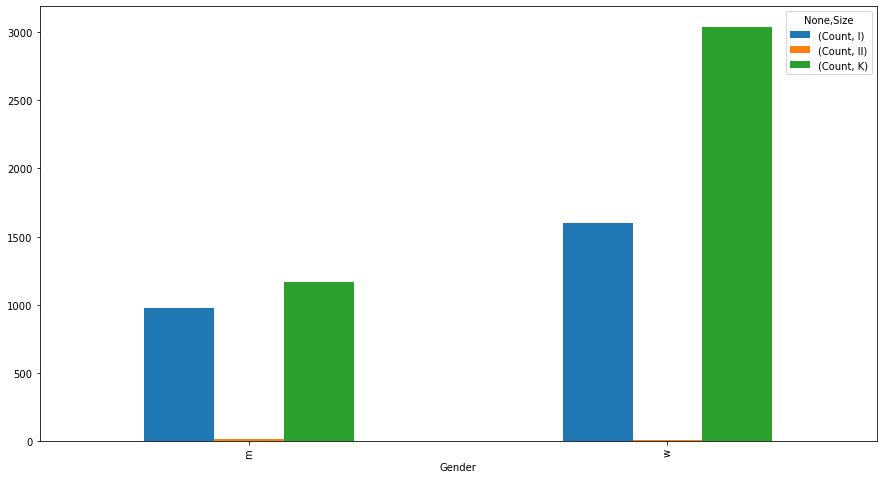

In [13]:
Age_Size = pd.DataFrame(Y2015[['Gender', 'Size']].value_counts())
Age_Size.reset_index(inplace= True)
Age_Size.columns = ['Gender', 'Size', 'Count']
Age_Size_df = Age_Size.set_index(['Gender', 'Size'])
Age_Size_df.unstack().plot(kind='bar',figsize=(15, 8))

It's clear that more people prefer smaller dogs and pure breed. This could be many things like apartment size and maybe smaller dogs being easier to handle. 
But then, why are mixed breed being neglected more compare to pure ones?

,Primary Breed Mixed
Pure,6312
Mischling,668


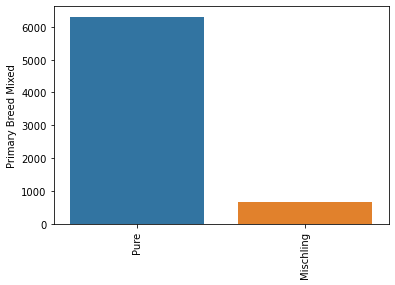

In [8]:
Mixed_dog = pd.DataFrame(Y2015['Primary Breed Mixed'].fillna('Pure').value_counts())
sns.barplot(data= Mixed_dog, x =Mixed_dog.index, y = 'Primary Breed Mixed')
plt.xticks(rotation=90)
Mixed_dog

<AxesSubplot:xlabel='Primary Breed Mixed', ylabel='Age'>

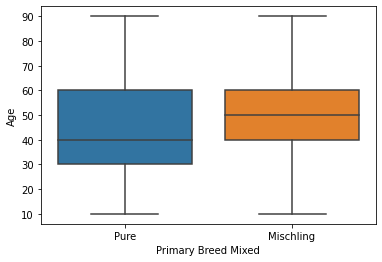

In [9]:
Age_Mixed_dog = pd.DataFrame(Y2015[['Primary Breed Mixed', 'Age']].fillna('Pure'))
x = Age_Mixed_dog.set_index('Age').drop(index = 'Pure')
x.rename({'51-60':50, '41-50':40, '31-40':30, '61-70':60, '21-30':20, '71-80':70, '81-90':80, '11-20':10,
       '91-100':90}, inplace = True)
sns.boxplot(data =x, y=x.index, x ='Primary Breed Mixed' )

And why are the younger generation neglecting mixed breeds? Do pure breed look better and just there for looks? 
Are these dogs better to show their peers on Instagram?